# Mecánica de Medios Continuos
## Por Jorge I. Zuluaga
### Cuadernos de exploración numérica
### **Frontera entre medios: flotación**

## Estrellas

Es posible descargar un modelo detallado del interior estelar: http://www.astro.wisc.edu/~townsend/static.php?ref=ez-web.

Valores ya descargados de los datos están disponibles en: 

In [ ]:
!wget https://github.com/seap-udea/pyconmat/raw/main/data/solar-model.zip

--2021-12-10 18:57:55--  https://github.com/seap-udea/pyconmat/raw/main/data/solar-model.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/seap-udea/pyconmat/main/data/solar-model.zip [following]
--2021-12-10 18:57:56--  https://raw.githubusercontent.com/seap-udea/pyconmat/main/data/solar-model.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2461178 (2.3M) [application/zip]
Saving to: ‘solar-model.zip’

solar-model.zip     100%[===================>]   2.35M  --.-KB/s    in 0.05s   

2021-12-10 18:57:56 (51.9 MB/s) - ‘solar-model.zip’ saved [2461178/2461178]



In [ ]:
!unzip solar-model.zip

Archive:  solar-model.zip
  inflating: structure_00000.txt     
  inflating: structure_00001.txt     
  inflating: structure_00002.txt     
  inflating: structure_00003.txt     
  inflating: structure_00004.txt     
  inflating: structure_00005.txt     
  inflating: structure_00006.txt     
  inflating: structure_00007.txt     
  inflating: structure_00008.txt     
  inflating: structure_00009.txt     
  inflating: structure_00010.txt     
  inflating: structure_00011.txt     
  inflating: structure_00012.txt     
  inflating: structure_00013.txt     
  inflating: structure_00014.txt     
  inflating: structure_00015.txt     
  inflating: structure_00016.txt     
  inflating: structure_00017.txt     
  inflating: structure_00018.txt     
  inflating: structure_00019.txt     
  inflating: structure_00020.txt     
  inflating: structure_00021.txt     
  inflating: structure_00022.txt     
  inflating: structure_00023.txt     
  inflating: structure_00024.txt     
  inflating: structure_0

In [ ]:
!tail -n 5 summary.txt

00061  3.88962452E+09  9.99653214E-01 -1.86076170E-02 -7.04529775E-03  3.76056024E+00  7.18220225E+00  5.13223151E+00  1.63367232E+01 -1.54335760E+00  4.08348417E-01  5.70984722E-01  1.99250556E-05  5.42428627E-03  9.81155490E-03  2.19419131E+03  8.37785531E+06  1.08575939E+10  9.50348671E-01  8.79132359E-03  1.44794310E-33  0.00000000E+00  5.07915371E-08  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00
00062  4.06034558E+09  9.99635006E-01 -1.26041325E-02 -4.70348384E-03  3.76089021E+00  7.18515306E+00  5.14411498E+00  1.63455517E+01 -1.53562397E+00  3.94314843E-01  5.85023550E-01  2.03268431E-05  5.46013051E-03  9.77005436E-03  2.21203079E+03  8.21810596E+06  1.07083412E+10  9.62900993E-01  9.78407732E-03  2.03543100E-33  0.00000000E+00  5.31214282E-08  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00  0.00000000E+00
00063  4.22989604E+09  9.99616602E-01 -6.62937157E-03 -2.26652615E-03  3.76116542E+00  7.188

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Los datos en cada archivo de estructura tienen las siguientes columnas:

In [ ]:
"""
Column Number	Datum	Description
1	Mr	Lagrangian mass coordinate (M☉)
2	r	Radius coordinate (R☉)
3	Lr	Luminosity (L☉)
4	P	Total pressure (N m-2)
5	ρ	Density (kg m-3)
6	T	Temperature (K)
7	U	Specific internal energy (J kg-1)
8	S	Specific entropy (J K-1 kg-1)
9	CP	Specific heat at constant pressure (J K-1 kg-1)
10	Γ1	First adiabatic exponent
11	∇ad	Adiabatic temperature gradient
12	μ	Mean molecular weight (see note below)
13	ne	Electron number density (m-3)
14	Pe	Electron pressure (N m-2)
15	Pr	Radiation pressure (N m-2)
16	∇rad	Radiative temperature gradient
17	∇	Material temperature gradient
18	vc	Convective velocity (m s-1)
19	κ	Rosseland mean opacity (m2 kg-1)
20	εnuc	Power per unit mass from all nuclear reactions, excluding neutrino losses (W kg-1)
21	εPP	Power per unit mass from PP chain (W kg-1)
22	εCNO	Power per unit mass from CNO cycle (W kg-1)
23	ε3α	Power per unit mass from triple-alpha reaction (W kg-1)
24	εν,nuc	Power loss per unit mass in nuclear neutrinos (W kg-1)
25	εν	Power loss per unit mass in non-nuclear neutrinos (W kg-1)
26	εgrav	Power per unit mass from gravitational contraction (W kg-1)
27	X	Hydrogen mass fraction (all ionization stages)
28	—	Molecular hydrogen mass fraction
29	X+	Singly-ionized hydrogen mass fraction
30	Y	Helium mass fraction (all ionization stages)
31	Y+	Singly-ionized helium mass fraction
32	Y++	Doubly-ionized helium mass fraction
33	XC	Carbon mass fraction
34	XN	Nitrogren mass fraction
35	XO	Oxygen mass fraction
36	ψ	Electron degeneracy parameter
""";

Los datos globales de la estrella en cada paso de integración están en el archivo `summary.txt` con las siguientes columnas:

In [ ]:
"""
1	i	Step number
2	t	Age (years)
3	M	Mass (M☉)
4	Log10 L	Luminosity (L☉)
5	Log10 R	Radius (R☉)
6	Log10 Ts	Surface temperature (K)
7	Log10 Tc	Central temperature (K)
8	Log10 ρc	Central density (kg m-3)
9	Log10 Pc	Central pressure (N m-2)
10	ψc	Central electron degeneracy parameter
11	Xc	Central hydrogen mass fraction
12	Yc	Central helium mass fraction
13	XC,c	Central carbon mass fraction
14	XN,c	Central nitrogen mass fraction
15	XO,c	Central oxygen mass fraction
16	τdyn	Dynamical timescale (seconds)
17	τKH	Kelvin-Helmholtz timescale (years)
18	τnuc	Nuclear timescale (years)
19	LPP	Luminosity from PP chain (L☉)
20	LCNO	Luminosity from CNO cycle (L☉)
21	L3α	Luminosity from triple-alpha reactions (L☉)
22	LZ	Luminosity from metal burning (L☉)
23	Lν	Luminosity of neutrino losses (L☉)
24	MHe	Mass of helium core (M☉)
25	MC	Mass of carbon core (M☉)
26	MO	Mass of oxygen core (M☉)
27	RHe	Radius of helium core (R☉)
28	RC	Radius of carbon core (R☉)
29	RO	Radius of oxygen core (R☉)
""";

Leamos el archivo y veamos la edad de la estrella en cada archivo de estructura:

In [ ]:
datos=np.loadtxt("summary.txt")
datos[:,1]

array([0.00000000e+00, 5.00000000e+04, 1.00000000e+05, 1.60000000e+05,
       2.32000000e+05, 3.18400000e+05, 4.22080000e+05, 5.46496000e+05,
       6.95795200e+05, 8.74954240e+05, 1.08994509e+06, 1.34793411e+06,
       1.65752093e+06, 2.02902511e+06, 2.47483013e+06, 3.00979616e+06,
       3.65175539e+06, 4.42210647e+06, 5.34652777e+06, 6.45583332e+06,
       7.78699998e+06, 9.38439998e+06, 1.13012800e+07, 1.36015360e+07,
       1.63618432e+07, 1.96742118e+07, 2.36490542e+07, 2.84188650e+07,
       3.41426380e+07, 4.10111656e+07, 4.92533987e+07, 5.91440784e+07,
       7.10128941e+07, 8.52554730e+07, 1.02346568e+08, 1.22855881e+08,
       1.47467057e+08, 1.77000469e+08, 2.12440562e+08, 2.54968675e+08,
       3.06002410e+08, 3.67242892e+08, 4.40731470e+08, 5.28917764e+08,
       6.34741317e+08, 7.61729581e+08, 9.14115497e+08, 1.09697860e+09,
       1.31641432e+09, 1.54898087e+09, 1.77002222e+09, 1.97990273e+09,
       2.18690941e+09, 2.39397010e+09, 2.59545554e+09, 2.78929645e+09,
      

Leamos el último estado de la estrella, que corresponde a una edad de 4500 millones de años y extraigamos las columnas básica (r, Mr, ρ, p, T)

In [ ]:
datos=np.loadtxt("structure_00065.txt")
Mrs=datos[:,0]
rs=datos[:,1]
ps=datos[:,3]
rhos=datos[:,4]
Ts=datos[:,5]
cps=datos[:,8]

Grafiquemos los datos:

Text(0.5, 0, '$r$ [$R_\\star$]')

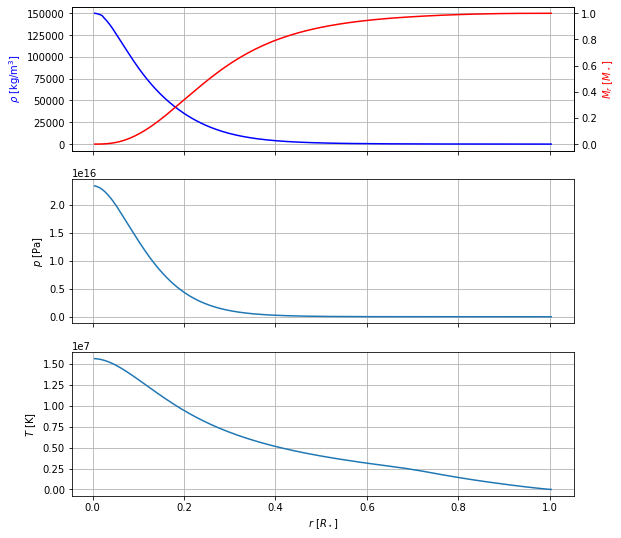

In [ ]:
fig,axs=plt.subplots(3,1,figsize=(9,9),sharex=True)

ax=axs[0]
ax.plot(rs,rhos,'b-')
ax.set_ylabel(r"$\rho$ [kg/m$^3$]",color='b')
ax.grid()
axM=ax.twinx()
axM.plot(rs,Mrs,'r-')
axM.set_ylabel(r"$M_r$ [$M_\star$]",color='r')

ax=axs[1]
ax.plot(rs,ps)
ax.set_ylabel(r"$p$ [Pa]")
ax.grid()

ax=axs[2]
ax.plot(rs,Ts)
ax.set_ylabel(r"$T$ [K]")
ax.grid()

ax.set_xlabel(r"$r$ [$R_\star$]")

In [ ]:
Ts[-1],rhos[-1],ps[-1]

(15598762.8, 149988.663, 2.34020213e+16)

Ahora podemos calcular el coeficiente adiabático efectivo:

In [ ]:
logTs=np.log(Ts)
logps=np.log(ps)
gamma_effs=1/(1-((logTs[1:]-logTs[:-1])/(logps[1:]-logps[:-1])))
gamma_effs

array([1.22062351, 1.58296076, 3.07958114, 4.63326123, 2.24708174,
       1.57589424, 1.34748615, 1.24647865, 1.19609525, 1.16961277,
       1.15571358, 1.14908982, 1.1470839 , 1.14831768, 1.1520893 ,
       1.15809258, 1.16627815, 1.17677185, 1.18979424, 1.20552628,
       1.22389428, 1.24443663, 1.26678865, 1.29207064, 1.32379742,
       1.36618519, 1.41977582, 1.47690659, 1.52144512, 1.53665771,
       1.52357098, 1.50929927, 1.51941418, 1.55355927, 1.59313574,
       1.62284599, 1.64058454, 1.65066141, 1.65678431, 1.66083159,
       1.66355022, 1.66516268, 1.66572344, 1.66533977, 1.63068537,
       1.46181315, 1.30722255, 1.27171941, 1.25494144, 1.24561026,
       1.24004667, 1.23657083, 1.2347103 , 1.23388862, 1.23353849,
       1.23363504, 1.23421523, 1.23509062, 1.23614309, 1.23743023,
       1.23900275, 1.24081412, 1.24279632, 1.24492202, 1.24720434,
       1.24967103, 1.25233857, 1.25520893, 1.25827755, 1.26154782,
       1.26502935, 1.2687216 , 1.27261343, 1.27668781, 1.28092

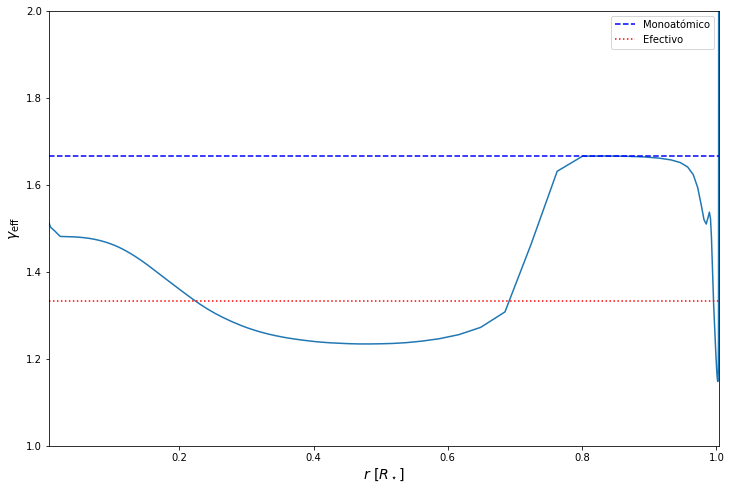

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(rs[:-1],gamma_effs)
ax.set_ylim(1,2)
ax.axhline(5/3,label="Monoatómico",color='b',ls="--")
ax.axhline(4/3,label="Efectivo",color='r',ls=":")
ax.legend()
ax.set_ylabel(r"$\gamma_{\rm eff}$",fontsize=14)
ax.set_xlabel(r"$r$ [$R_\star$]",fontsize=14)
ax.margins(0)

## La ecuación de Lane-Emden

$$
\frac{1}{\xi^{2}} \frac{d}{d \xi}\left(\xi^{2} \frac{d\theta}{d \xi}\right)+\theta^{\frac{1}{\gamma-1}}=0
$$

Que se puede escribir como:
$$
\frac{d^2\theta}{d \xi^2}=-\frac{2}{\xi}\frac{d\theta}{d \xi}-\theta^{\frac{1}{\gamma-1}}
$$


Cerca al centro:

Text(0.5, 0, '$r$ [$R_\\star$]')

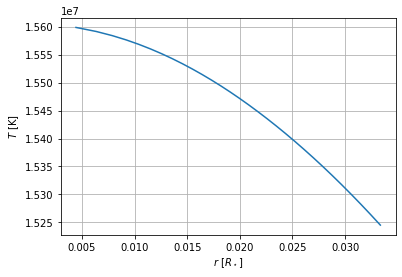

In [ ]:
fig,axs=plt.subplots()

ax=axs
ax.plot(rs[::-1][:30],Ts[::-1][:30])
ax.set_ylabel(r"$T$ [K]")
ax.grid()
ax.set_xlabel(r"$r$ [$R_\star$]")

In [ ]:
def lane_emden(Y,x,gamma=5/3):
  teta,tetap=Y

  dtetadr=tetap
  dtetapdr=-2/x*tetap-teta**(1/(gamma-1))

  return np.array([dtetadr,dtetapdr])

In [ ]:
from scipy.integrate import odeint

In [ ]:
eval("3**2")

9

In [ ]:
operacion=input("Entre la operacion:")
eval(operacion)

Entre la operacion:1


1

In [ ]:
exec("y=1")

In [ ]:
y

1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


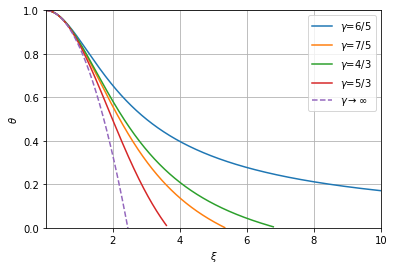

In [ ]:
xs=np.linspace(1e-2,10,1000)
Yo=[1,0]

fig,ax=plt.subplots()

gamma="6/5"
solucion=odeint(lane_emden,Yo,xs,args=(eval(gamma),))
teta=solucion[:,0]
tetap=solucion[:,1]
ax.plot(xs,teta,label=rf"$\gamma$={gamma}")

gamma="7/5"
solucion=odeint(lane_emden,Yo,xs,args=(eval(gamma),))
teta=solucion[:,0]
tetap=solucion[:,1]
ax.plot(xs,teta,label=rf"$\gamma$={gamma}")

gamma="4/3"
solucion=odeint(lane_emden,Yo,xs,args=(eval(gamma),))
teta=solucion[:,0]
tetap=solucion[:,1]
ax.plot(xs,teta,label=rf"$\gamma$={gamma}")

gamma="5/3"
solucion=odeint(lane_emden,Yo,xs,args=(eval(gamma),))
teta=solucion[:,0]
tetap=solucion[:,1]
ax.plot(xs,teta,label=rf"$\gamma$={gamma}")

gamma="5/3"
tetap=1-xs**2/6
ax.plot(xs,tetap,ls='--',label=rf"$\gamma\rightarrow\infty$")

ax.set_ylim(0,1)
ax.set_xlabel(r"$\xi$")
ax.set_ylabel(r"$\theta$")
ax.grid()
ax.legend()
ax.margins(0)

Text(0.5, 0, '$r$ [$R_\\star$]')

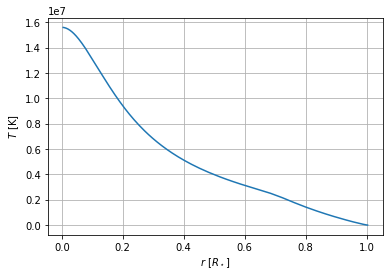

In [ ]:
fig,axs=plt.subplots()

ax=axs
ax.plot(rs,Ts)
ax.set_ylabel(r"$T$ [K]")
ax.grid()
ax.set_xlabel(r"$r$ [$R_\star$]")

Vamos a comparar con el modelo realista:

In [ ]:
gamma_eff=1.3
rhoc=rhos[-1]
Tc=Ts[-1]
#Masa molar
X=0.73
Z=0.02
Mmol=4/(3+5*X-Z)*1e-3 #kg/mol
R=8.31446261815324 #J/kg/mol
#Calor específico
cp=gamma_eff/(gamma_eff-1)*R/Mmol
#Parámetro lambda
G=6.67e-11
Rsun=6.96349e8
lamb=np.sqrt(cp*Tc/(4*np.pi*G*rhoc))
print(f"Lambda = {lamb/1e3} km")
#Mínimo radio solar (gamma -> infinito)
Rmin=np.sqrt(6)*lamb
print(f"Rmin = {Rmin/1e3} km")

Lambda = 86080.13135168876 km
Rmin = 210852.39880339027 km


In [ ]:
xs=np.linspace(1e-2,10,1000)
Yo=[1,0]

solucion=odeint(lane_emden,Yo,xs,args=(gamma_eff,))
teta=solucion[:,0]
tetap=solucion[:,1]

rs_sol=xs*lamb
Ts_sol=teta*Tc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


Text(0.5, 0, '$r$ [$R_\\star$]')

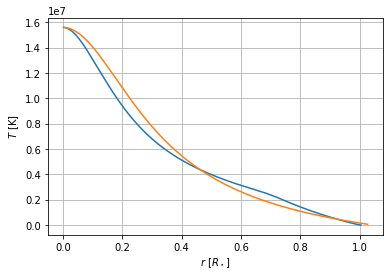

In [ ]:
fig,axs=plt.subplots()

ax=axs
ax.plot(rs,Ts)
ax.plot(rs_sol/Rsun,Ts_sol,label=rf"$\gamma$={gamma}")

ax.set_ylabel(r"$T$ [K]")
ax.grid()
ax.set_xlabel(r"$r$ [$R_\star$]")

La discrepancia es significativa.  Esto es porque debemos es usar lo que sabemos de la estrella (masa y radio) para calcular las condiciones interiores:

In [ ]:
#Asumimiendo
gamma_eff=1.25
xs=np.linspace(1e-2,10,1000)
Yo=[1,0]
solucion=odeint(lane_emden,Yo,xs,args=(gamma_eff,))
teta=solucion[:,0]
tetap=solucion[:,1]
xo=xs[np.invert(np.isnan(teta))][-1]
tetapo=tetap[np.invert(np.isnan(teta))][-1]
print(xo,tetapo)

10.0 -0.017960986979284655


In [ ]:
#Propiedades de la estrella
Rsun=6.96349e8 #m
Msun=1.98e30 #kg
rho0=Msun/(4/3*np.pi*Rsun**3)
go=G*Msun/Rsun**2
#Masa molar
X=0.73
Z=0.02
Mmol=4/(3+5*X-Z)*1e-3 #kg/mol
R=8.31446261815324 #J/kg/mol
#Calor específico
cp=gamma_eff/(gamma_eff-1)*R/Mmol
#Condiciones centrales
To=go*Rsun/cp
Tc=To/(-tetapo*xo)
rhoc=rho0*xo**2*Tc/(3*To)
print(f"Temperatura central {Tc}")
print(f"Densidad central {rhoc}")
#Lambda
lamb=np.sqrt(cp*Tc/(4*np.pi*G*rhoc))
print(f"Lambda = {lamb/1e3} km")
#Finalmente las condiciones son
rs_sol=xs*lamb
Ts_sol=teta*Tc

Temperatura central 15324141.143712487
Densidad central 259803.05849794648
Lambda = 69634.9 km


Text(0.5, 0, '$r$ [$R_\\star$]')

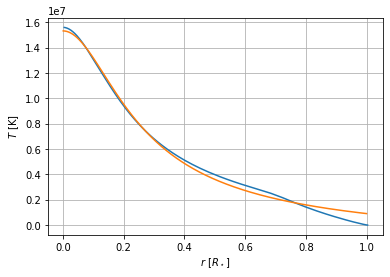

In [ ]:
fig,axs=plt.subplots()

ax=axs
ax.plot(rs,Ts)
ax.plot(rs_sol/Rsun,Ts_sol,label=rf"$\gamma$={gamma}")

ax.set_ylabel(r"$T$ [K]")
ax.grid()
ax.set_xlabel(r"$r$ [$R_\star$]")